In [14]:
#Collective bookmaker performance on error metrics from late 2023 until March 2025

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv("/Users/samharwood/Downloads/proptester.csv")

#drops null rows
df = df.dropna()

#Selection points is kill over/under lines from PP/UD. Combined metrics for both books

#MSE/RMSE Helper
mse = mean_squared_error(df["Total Kills"], df["selection_points"])

# Compute RMSE
rmse = np.sqrt(mse)

# Compute MAE
mae = mean_absolute_error(df["Total Kills"], df["selection_points"])

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Root Mean Squared Error (RMSE): 7.6115
Mean Absolute Error (MAE): 6.0350


In [4]:
#Prizepicks specific performance

import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

df = pd.read_csv("/Users/samharwood/Downloads/proptester.csv")

# drop null rows
df = df.dropna()

# Filter for PRIZEPICKS_56PICK_FLEX. 
df_filtered = df[df["bookmaker"] == "PRIZEPICKS_56PICK_FLEX"]

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(df_filtered["Total Kills"], df_filtered["selection_points"]))
mae = mean_absolute_error(df_filtered["Total Kills"], df_filtered["selection_points"])

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Root Mean Squared Error (RMSE): 7.5157
Mean Absolute Error (MAE): 5.9609


In [6]:
# Filter for UNDERDOG_FANTASY_35_PICK
df_ud = df[df["bookmaker"] == "UNDERDOG_FANTASY_35PICK"]

# Calculate RMSE and MAE
rmse_ud = np.sqrt(mean_squared_error(df_ud["Total Kills"], df_ud["selection_points"]))
mae_ud = mean_absolute_error(df_ud["Total Kills"], df_ud["selection_points"])

print(f"Root Mean Squared Error (RMSE) for UNDERDOG_FANTASY_35_PICK: {rmse_ud:.4f}")
print(f"Mean Absolute Error (MAE) for UNDERDOG_FANTASY_35_PICK: {mae_ud:.4f}")


Root Mean Squared Error (RMSE) for UNDERDOG_FANTASY_35_PICK: 7.6615
Mean Absolute Error (MAE) for UNDERDOG_FANTASY_35_PICK: 6.0741


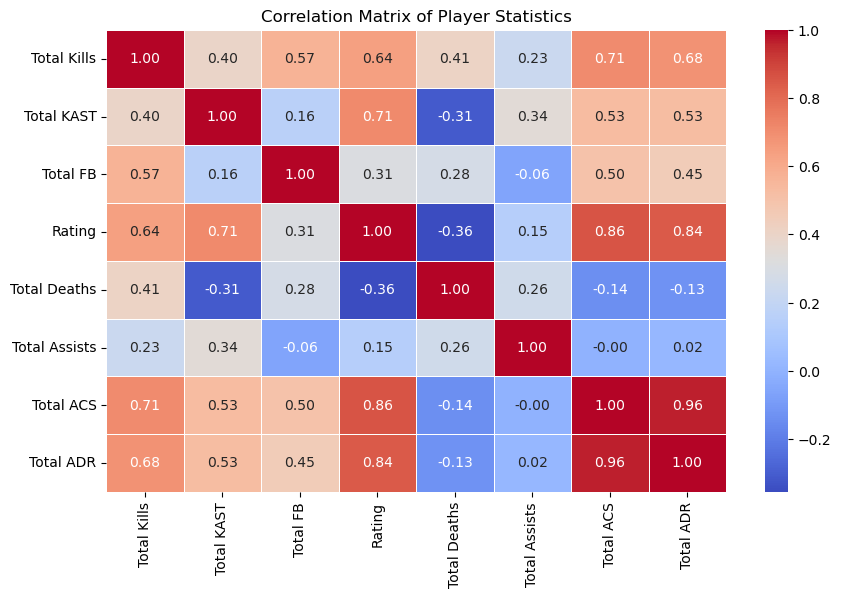

In [18]:
#Initial feature testing

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/samharwood/Downloads/statstester2.csv")

#Relevant columns
columns = ["Total Kills", "Total KAST", "Total FB", "Rating", "Total Deaths", "Total Assists", "Total ACS", "Total ADR"]

#Corr matrix
corr_matrix = df[columns].corr()

#Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Player Statistics")
plt.show()


In [8]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your dataset
df = pd.read_csv("/Users/samharwood/Downloads/statstester.csv")  

#Columns for VIF analysis
features = ["selection_points","Total Kills", "Total FB"]
df_vif = df[features].dropna() 

#VIF calculation by feature
vif_data = pd.DataFrame()
vif_data["Feature"] = features
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(features))]

print(vif_data)


            Feature        VIF
0  selection_points  15.794122
1       Total Kills  18.879048
2          Total FB   4.173423


In [20]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("/Users/samharwood/Downloads/statstester.csv")

# Ensure 'Total Kills' is numeric
df['Total Kills'] = pd.to_numeric(df['Total Kills'], errors='coerce')

# Drop null rows
df = df.dropna(subset=['Total Kills', 'agent'])

#Cleaning whitespace from agent column, had been an issue
df['agent'] = df['agent'].str.strip()

#Agent to categorical
df['agent'] = df['agent'].astype('category')

#Reordered so that Cypher is first (median agent by kills)
new_order = ['Cypher'] + [cat for cat in df['agent'].cat.categories if cat != 'Cypher']
df['agent'] = df['agent'].cat.reorder_categories(new_order, ordered=True)

# One-hot encode the 'agent' column (drop the first category so that "Cypher" is dropped)
df_encoded = pd.get_dummies(df['agent'], drop_first=True)

#Force conversion to floats (had been an issue)
X = df_encoded.astype(float)
y = df['Total Kills'].astype(float)

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

print(model.summary())

print("\nSample size per agent category:")
print(df['agent'].value_counts())

# Extract the coefficients, skipping constant
coef_table = model.params[1:]  
coef_table_sorted = coef_table.sort_values(ascending=False)

print("\nSorted coefficients by agent category (highest to lowest):")
for index, (agent, coef) in enumerate(coef_table_sorted.items(), start=1):
    print(f"{index}. {agent}: {coef:.4f}")



                            OLS Regression Results                            
Dep. Variable:            Total Kills   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     960.5
Date:                Sat, 05 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:46:07   Log-Likelihood:            -1.6437e+06
No. Observations:              452018   AIC:                         3.287e+06
Df Residuals:                  451992   BIC:                         3.288e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.4323      0.061    447.909      0.0

In [9]:
#Agent results from Patches 10.00-10.02 up to heldout data

import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("/Users/samharwood/Downloads/statstester.csv")

# Ensure 'Total Kills' is numeric
df['Total Kills'] = pd.to_numeric(df['Total Kills'], errors='coerce')

# Drop null rows
df = df.dropna(subset=['Total Kills', 'agent'])

#Cleaning whitespace from agent column, had been an issue
df['agent'] = df['agent'].str.strip()

#Agent to categorical
df['agent'] = df['agent'].astype('category')

#Reordered so that Cypher is first (median agent by kills)
new_order = ['Cypher'] + [cat for cat in df['agent'].cat.categories if cat != 'Cypher']
df['agent'] = df['agent'].cat.reorder_categories(new_order, ordered=True)

# One-hot encode the 'agent' column (drop the first category so that "Cypher" is dropped)
df_encoded = pd.get_dummies(df['agent'], drop_first=True)

#Force conversion to floats (had been an issue)
X = df_encoded.astype(float)
y = df['Total Kills'].astype(float)

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

print(model.summary())

print("\nSample size per agent category:")
print(df['agent'].value_counts())

# Extract the coefficients, skipping constant
coef_table = model.params[1:]  
coef_table_sorted = coef_table.sort_values(ascending=False)

print("\nSorted coefficients by agent category (highest to lowest):")
for index, (agent, coef) in enumerate(coef_table_sorted.items(), start=1):
    print(f"{index}. {agent}: {coef:.4f}")



                            OLS Regression Results                            
Dep. Variable:            Total Kills   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     15.28
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           6.29e-63
Time:                        21:22:03   Log-Likelihood:                -15551.
No. Observations:                5075   AIC:                         3.115e+04
Df Residuals:                    5049   BIC:                         3.132e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1083      0.261     54.103      0.0

In [152]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Computes patch distance, with weighting penalties for first number changes (ex 10 to 9)
# These are the largest impact patches, which change the map pool and often agent capabilities
def custom_patch_distance(train_patch, holdout_patch, major_multiplier=10):
    holdout_major, holdout_minor = holdout_patch
    train_major, train_minor = train_patch
    return (holdout_major - train_major) * major_multiplier + (holdout_minor - train_minor)

df = pd.read_csv("/Users/samharwood/Downloads/statstester.csv")

# Patch format change for easy version comparison (ex "10.02" is (10, 2))
df['patch_tuple'] = df['match_patch'].apply(lambda x: tuple(map(int, str(x).split('.'))))

# Sort patches by recency (most recent first)
unique_patches = sorted(df['patch_tuple'].unique(), reverse=True)
most_recent_patch = unique_patches[0]

# Split into holdout and training sets
holdout_df = df[df['patch_tuple'] == most_recent_patch].copy()
train_df = df[df['patch_tuple'] != most_recent_patch].copy()

#Ensures holdout set containing most recent patch is capped at 1000, allowing 705 rows of data from current patch to be integrated into training
if len(holdout_df) > 1000:
    holdout_df = holdout_df.sample(n=1000, random_state=42)

# The remaining rows of the most recent patch (10, 2) will go into the training set
remaining_holdout_rows = df[(df['patch_tuple'] == most_recent_patch) & (~df.index.isin(holdout_df.index))]
train_df = pd.concat([train_df, remaining_holdout_rows])

# Only keep players with at least 5 matches, ensuring roughly 100 round player samples
valid_players = train_df.groupby('player').filter(lambda g: len(g) >= 5)['player'].unique()
train_df = train_df[train_df['player'].isin(valid_players)].copy()

# Define decay rates and major multipliers to test
decay_rates = [0.03, 0.05, 0.1, 0.15, 0.5]
major_multipliers = [10, 15, 20, 25]

results = {}
results_rmse = {}

for decay in decay_rates:
    print(f"Testing decay: {decay}")
    for major_multiplier in major_multipliers:
        print(f"  Testing major_multiplier: {major_multiplier}")

        # Decay weight is exp(-decay * distance), accounting for patch distance
        train_df['decay_weight'] = train_df.apply(
            lambda row: np.exp(-decay * custom_patch_distance(row['patch_tuple'], most_recent_patch, major_multiplier=major_multiplier)),
            axis=1
        )

        # Patch distance printed; way to check if decay weights intuitively make sense
        train_df['patch_distance'] = train_df['patch_tuple'].apply(
            lambda x: custom_patch_distance(x, most_recent_patch, major_multiplier=major_multiplier)
        )

        # Optionally inspect the highest patch distances and corresponding decay weights.
        print(train_df[['patch_tuple', 'patch_distance', 'decay_weight']].sort_values('patch_distance', ascending=False).head(10))

        # Compute the weighted average kills per player using the computed decay weights.
        def weighted_avg(group):
            return np.average(group['kills'], weights=group['decay_weight'])
        
        player_perf = (
            train_df.groupby('player', group_keys=False)
            .apply(weighted_avg)
            .reset_index(name='predicted_kills')
        )
        
        # Merges these player-level predictions with the holdout set
        merged = holdout_df.merge(player_perf, on='player', how='left')

        # Drop rows with NaN (ex players not having a large enough training match sample)
        merged = merged.dropna(subset=['predicted_kills'])
        
        # Compute MAE
        mae = np.mean(np.abs(merged['kills'] - merged['predicted_kills']))
        # Compute RMSE
        rmse = np.sqrt(mean_squared_error(merged['kills'], merged['predicted_kills']))
        
        print(f"    MAE for major_multiplier {major_multiplier}: {mae:.3f}")
        print(f"    RMSE for major_multiplier {major_multiplier}: {rmse:.3f}")
        
        results[(decay, major_multiplier)] = mae
        results_rmse[(decay, major_multiplier)] = rmse

print("\nSummary Results:")
for (decay, major_multiplier), mae in results.items():
    rmse = results_rmse[(decay, major_multiplier)]
    print(f"Decay rate {decay}, major_multiplier {major_multiplier}: MAE = {mae:.3f}, RMSE = {rmse:.3f}")


Testing decay: 0.03
  Testing major_multiplier: 10
       patch_tuple  patch_distance  decay_weight
664269      (3, 1)              71      0.118837
666359      (3, 1)              71      0.118837
666341      (3, 1)              71      0.118837
666342      (3, 1)              71      0.118837
666343      (3, 1)              71      0.118837
666344      (3, 1)              71      0.118837
666345      (3, 1)              71      0.118837
666346      (3, 1)              71      0.118837
666347      (3, 1)              71      0.118837
666348      (3, 1)              71      0.118837


/var/folders/cp/v9x7jh4x7f9b1v1bp5tjcjlm0000gn/T/ipykernel_86554/2479564742.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg)


    MAE for major_multiplier 10: 4.186
    RMSE for major_multiplier 10: 5.258
  Testing major_multiplier: 15
       patch_tuple  patch_distance  decay_weight
665920      (3, 1)             106      0.041586
666971      (3, 1)             106      0.041586
666987      (3, 1)             106      0.041586
666986      (3, 1)             106      0.041586
666985      (3, 1)             106      0.041586
666984      (3, 1)             106      0.041586
666983      (3, 1)             106      0.041586
666982      (3, 1)             106      0.041586
666981      (3, 1)             106      0.041586
666980      (3, 1)             106      0.041586


/var/folders/cp/v9x7jh4x7f9b1v1bp5tjcjlm0000gn/T/ipykernel_86554/2479564742.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg)


    MAE for major_multiplier 15: 4.165
    RMSE for major_multiplier 15: 5.227
  Testing major_multiplier: 20
       patch_tuple  patch_distance  decay_weight
665920      (3, 1)             141      0.014552
666971      (3, 1)             141      0.014552
666987      (3, 1)             141      0.014552
666986      (3, 1)             141      0.014552
666985      (3, 1)             141      0.014552
666984      (3, 1)             141      0.014552
666983      (3, 1)             141      0.014552
666982      (3, 1)             141      0.014552
666981      (3, 1)             141      0.014552
666980      (3, 1)             141      0.014552


/var/folders/cp/v9x7jh4x7f9b1v1bp5tjcjlm0000gn/T/ipykernel_86554/2479564742.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg)


    MAE for major_multiplier 20: 4.152
    RMSE for major_multiplier 20: 5.206
  Testing major_multiplier: 25
       patch_tuple  patch_distance  decay_weight
665920      (3, 1)             176      0.005092
666971      (3, 1)             176      0.005092
666987      (3, 1)             176      0.005092
666986      (3, 1)             176      0.005092
666985      (3, 1)             176      0.005092
666984      (3, 1)             176      0.005092
666983      (3, 1)             176      0.005092
666982      (3, 1)             176      0.005092
666981      (3, 1)             176      0.005092
666980      (3, 1)             176      0.005092


/var/folders/cp/v9x7jh4x7f9b1v1bp5tjcjlm0000gn/T/ipykernel_86554/2479564742.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg)


    MAE for major_multiplier 25: 4.144
    RMSE for major_multiplier 25: 5.194
Testing decay: 0.05
  Testing major_multiplier: 10
       patch_tuple  patch_distance  decay_weight
664269      (3, 1)              71      0.028725
666359      (3, 1)              71      0.028725
666341      (3, 1)              71      0.028725
666342      (3, 1)              71      0.028725
666343      (3, 1)              71      0.028725
666344      (3, 1)              71      0.028725
666345      (3, 1)              71      0.028725
666346      (3, 1)              71      0.028725
666347      (3, 1)              71      0.028725
666348      (3, 1)              71      0.028725


/var/folders/cp/v9x7jh4x7f9b1v1bp5tjcjlm0000gn/T/ipykernel_86554/2479564742.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg)


    MAE for major_multiplier 10: 4.164
    RMSE for major_multiplier 10: 5.224
  Testing major_multiplier: 15
       patch_tuple  patch_distance  decay_weight
665920      (3, 1)             106      0.004992
666971      (3, 1)             106      0.004992
666987      (3, 1)             106      0.004992
666986      (3, 1)             106      0.004992
666985      (3, 1)             106      0.004992
666984      (3, 1)             106      0.004992
666983      (3, 1)             106      0.004992
666982      (3, 1)             106      0.004992
666981      (3, 1)             106      0.004992
666980      (3, 1)             106      0.004992


/var/folders/cp/v9x7jh4x7f9b1v1bp5tjcjlm0000gn/T/ipykernel_86554/2479564742.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg)


    MAE for major_multiplier 15: 4.148
    RMSE for major_multiplier 15: 5.199
  Testing major_multiplier: 20
       patch_tuple  patch_distance  decay_weight
665920      (3, 1)             141      0.000867
666971      (3, 1)             141      0.000867
666987      (3, 1)             141      0.000867
666986      (3, 1)             141      0.000867
666985      (3, 1)             141      0.000867
666984      (3, 1)             141      0.000867
666983      (3, 1)             141      0.000867
666982      (3, 1)             141      0.000867
666981      (3, 1)             141      0.000867
666980      (3, 1)             141      0.000867


/var/folders/cp/v9x7jh4x7f9b1v1bp5tjcjlm0000gn/T/ipykernel_86554/2479564742.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg)


    MAE for major_multiplier 20: 4.140
    RMSE for major_multiplier 20: 5.187
  Testing major_multiplier: 25
       patch_tuple  patch_distance  decay_weight
665920      (3, 1)             176      0.000151
666971      (3, 1)             176      0.000151
666987      (3, 1)             176      0.000151
666986      (3, 1)             176      0.000151
666985      (3, 1)             176      0.000151
666984      (3, 1)             176      0.000151
666983      (3, 1)             176      0.000151
666982      (3, 1)             176      0.000151
666981      (3, 1)             176      0.000151
666980      (3, 1)             176      0.000151


/var/folders/cp/v9x7jh4x7f9b1v1bp5tjcjlm0000gn/T/ipykernel_86554/2479564742.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg)


    MAE for major_multiplier 25: 4.134
    RMSE for major_multiplier 25: 5.181
Testing decay: 0.1
  Testing major_multiplier: 10
       patch_tuple  patch_distance  decay_weight
664269      (3, 1)              71      0.000825
666359      (3, 1)              71      0.000825
666341      (3, 1)              71      0.000825
666342      (3, 1)              71      0.000825
666343      (3, 1)              71      0.000825
666344      (3, 1)              71      0.000825
666345      (3, 1)              71      0.000825
666346      (3, 1)              71      0.000825
666347      (3, 1)              71      0.000825
666348      (3, 1)              71      0.000825


/var/folders/cp/v9x7jh4x7f9b1v1bp5tjcjlm0000gn/T/ipykernel_86554/2479564742.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg)


    MAE for major_multiplier 10: 4.151
    RMSE for major_multiplier 10: 5.199
  Testing major_multiplier: 15
       patch_tuple  patch_distance  decay_weight
665920      (3, 1)             106      0.000025
666971      (3, 1)             106      0.000025
666987      (3, 1)             106      0.000025
666986      (3, 1)             106      0.000025
666985      (3, 1)             106      0.000025
666984      (3, 1)             106      0.000025
666983      (3, 1)             106      0.000025
666982      (3, 1)             106      0.000025
666981      (3, 1)             106      0.000025
666980      (3, 1)             106      0.000025


/var/folders/cp/v9x7jh4x7f9b1v1bp5tjcjlm0000gn/T/ipykernel_86554/2479564742.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg)


    MAE for major_multiplier 15: 4.141
    RMSE for major_multiplier 15: 5.192
  Testing major_multiplier: 20
       patch_tuple  patch_distance  decay_weight
665920      (3, 1)             141  7.523983e-07
666971      (3, 1)             141  7.523983e-07
666987      (3, 1)             141  7.523983e-07
666986      (3, 1)             141  7.523983e-07
666985      (3, 1)             141  7.523983e-07
666984      (3, 1)             141  7.523983e-07
666983      (3, 1)             141  7.523983e-07
666982      (3, 1)             141  7.523983e-07
666981      (3, 1)             141  7.523983e-07
666980      (3, 1)             141  7.523983e-07


/var/folders/cp/v9x7jh4x7f9b1v1bp5tjcjlm0000gn/T/ipykernel_86554/2479564742.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg)


    MAE for major_multiplier 20: 4.142
    RMSE for major_multiplier 20: 5.203
  Testing major_multiplier: 25
       patch_tuple  patch_distance  decay_weight
665920      (3, 1)             176  2.272046e-08
666971      (3, 1)             176  2.272046e-08
666987      (3, 1)             176  2.272046e-08
666986      (3, 1)             176  2.272046e-08
666985      (3, 1)             176  2.272046e-08
666984      (3, 1)             176  2.272046e-08
666983      (3, 1)             176  2.272046e-08
666982      (3, 1)             176  2.272046e-08
666981      (3, 1)             176  2.272046e-08
666980      (3, 1)             176  2.272046e-08


/var/folders/cp/v9x7jh4x7f9b1v1bp5tjcjlm0000gn/T/ipykernel_86554/2479564742.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg)


    MAE for major_multiplier 25: 4.144
    RMSE for major_multiplier 25: 5.219
Testing decay: 0.15
  Testing major_multiplier: 10
       patch_tuple  patch_distance  decay_weight
664269      (3, 1)              71      0.000024
666359      (3, 1)              71      0.000024
666341      (3, 1)              71      0.000024
666342      (3, 1)              71      0.000024
666343      (3, 1)              71      0.000024
666344      (3, 1)              71      0.000024
666345      (3, 1)              71      0.000024
666346      (3, 1)              71      0.000024
666347      (3, 1)              71      0.000024
666348      (3, 1)              71      0.000024


/var/folders/cp/v9x7jh4x7f9b1v1bp5tjcjlm0000gn/T/ipykernel_86554/2479564742.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg)


    MAE for major_multiplier 10: 4.156
    RMSE for major_multiplier 10: 5.207
  Testing major_multiplier: 15
       patch_tuple  patch_distance  decay_weight
665920      (3, 1)             106  1.243706e-07
666971      (3, 1)             106  1.243706e-07
666987      (3, 1)             106  1.243706e-07
666986      (3, 1)             106  1.243706e-07
666985      (3, 1)             106  1.243706e-07
666984      (3, 1)             106  1.243706e-07
666983      (3, 1)             106  1.243706e-07
666982      (3, 1)             106  1.243706e-07
666981      (3, 1)             106  1.243706e-07
666980      (3, 1)             106  1.243706e-07


/var/folders/cp/v9x7jh4x7f9b1v1bp5tjcjlm0000gn/T/ipykernel_86554/2479564742.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg)


    MAE for major_multiplier 15: 4.153
    RMSE for major_multiplier 15: 5.218
  Testing major_multiplier: 20
       patch_tuple  patch_distance  decay_weight
665920      (3, 1)             141  6.526370e-10
666971      (3, 1)             141  6.526370e-10
666987      (3, 1)             141  6.526370e-10
666986      (3, 1)             141  6.526370e-10
666985      (3, 1)             141  6.526370e-10
666984      (3, 1)             141  6.526370e-10
666983      (3, 1)             141  6.526370e-10
666982      (3, 1)             141  6.526370e-10
666981      (3, 1)             141  6.526370e-10
666980      (3, 1)             141  6.526370e-10


/var/folders/cp/v9x7jh4x7f9b1v1bp5tjcjlm0000gn/T/ipykernel_86554/2479564742.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg)


    MAE for major_multiplier 20: 4.153
    RMSE for major_multiplier 20: 5.239
  Testing major_multiplier: 25
       patch_tuple  patch_distance  decay_weight
665920      (3, 1)             176  3.424725e-12
666971      (3, 1)             176  3.424725e-12
666987      (3, 1)             176  3.424725e-12
666986      (3, 1)             176  3.424725e-12
666985      (3, 1)             176  3.424725e-12
666984      (3, 1)             176  3.424725e-12
666983      (3, 1)             176  3.424725e-12
666982      (3, 1)             176  3.424725e-12
666981      (3, 1)             176  3.424725e-12
666980      (3, 1)             176  3.424725e-12


/var/folders/cp/v9x7jh4x7f9b1v1bp5tjcjlm0000gn/T/ipykernel_86554/2479564742.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg)


    MAE for major_multiplier 25: 4.190
    RMSE for major_multiplier 25: 5.290
Testing decay: 0.5
  Testing major_multiplier: 10
       patch_tuple  patch_distance  decay_weight
664269      (3, 1)              71  3.824247e-16
666359      (3, 1)              71  3.824247e-16
666341      (3, 1)              71  3.824247e-16
666342      (3, 1)              71  3.824247e-16
666343      (3, 1)              71  3.824247e-16
666344      (3, 1)              71  3.824247e-16
666345      (3, 1)              71  3.824247e-16
666346      (3, 1)              71  3.824247e-16
666347      (3, 1)              71  3.824247e-16
666348      (3, 1)              71  3.824247e-16


/var/folders/cp/v9x7jh4x7f9b1v1bp5tjcjlm0000gn/T/ipykernel_86554/2479564742.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg)


    MAE for major_multiplier 10: 4.199
    RMSE for major_multiplier 10: 5.313
  Testing major_multiplier: 15
       patch_tuple  patch_distance  decay_weight
665920      (3, 1)             106  9.602680e-24
666971      (3, 1)             106  9.602680e-24
666987      (3, 1)             106  9.602680e-24
666986      (3, 1)             106  9.602680e-24
666985      (3, 1)             106  9.602680e-24
666984      (3, 1)             106  9.602680e-24
666983      (3, 1)             106  9.602680e-24
666982      (3, 1)             106  9.602680e-24
666981      (3, 1)             106  9.602680e-24
666980      (3, 1)             106  9.602680e-24


/var/folders/cp/v9x7jh4x7f9b1v1bp5tjcjlm0000gn/T/ipykernel_86554/2479564742.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg)


    MAE for major_multiplier 15: 4.337
    RMSE for major_multiplier 15: 5.495
  Testing major_multiplier: 20
       patch_tuple  patch_distance  decay_weight
665920      (3, 1)             141  2.411232e-31
666971      (3, 1)             141  2.411232e-31
666987      (3, 1)             141  2.411232e-31
666986      (3, 1)             141  2.411232e-31
666985      (3, 1)             141  2.411232e-31
666984      (3, 1)             141  2.411232e-31
666983      (3, 1)             141  2.411232e-31
666982      (3, 1)             141  2.411232e-31
666981      (3, 1)             141  2.411232e-31
666980      (3, 1)             141  2.411232e-31


/var/folders/cp/v9x7jh4x7f9b1v1bp5tjcjlm0000gn/T/ipykernel_86554/2479564742.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg)


    MAE for major_multiplier 20: 4.391
    RMSE for major_multiplier 20: 5.582
  Testing major_multiplier: 25
       patch_tuple  patch_distance  decay_weight
665920      (3, 1)             176  6.054602e-39
666971      (3, 1)             176  6.054602e-39
666987      (3, 1)             176  6.054602e-39
666986      (3, 1)             176  6.054602e-39
666985      (3, 1)             176  6.054602e-39
666984      (3, 1)             176  6.054602e-39
666983      (3, 1)             176  6.054602e-39
666982      (3, 1)             176  6.054602e-39
666981      (3, 1)             176  6.054602e-39
666980      (3, 1)             176  6.054602e-39
    MAE for major_multiplier 25: 4.397
    RMSE for major_multiplier 25: 5.593

Summary Results:
Decay rate 0.03, major_multiplier 10: MAE = 4.186, RMSE = 5.258
Decay rate 0.03, major_multiplier 15: MAE = 4.165, RMSE = 5.227
Decay rate 0.03, major_multiplier 20: MAE = 4.152, RMSE = 5.206
Decay rate 0.03, major_multiplier 25: MAE = 4.144, RMSE = 5.19

/var/folders/cp/v9x7jh4x7f9b1v1bp5tjcjlm0000gn/T/ipykernel_86554/2479564742.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_avg)


NameError: name 'df' is not defined